# A/B Testing for Marketing Promotions Strategy - Statistical & Hypothesis Testing
## Problem Introduction

In [34]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [36]:
df = pd.read_csv("marketing.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [37]:
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [38]:
sales_by_week = df.groupby("week")["SalesInThousands"].sum().sort_values(ascending=False)
sales_by_week

week
1    7369.31
3    7326.02
2    7313.96
4    7290.19
Name: SalesInThousands, dtype: float64

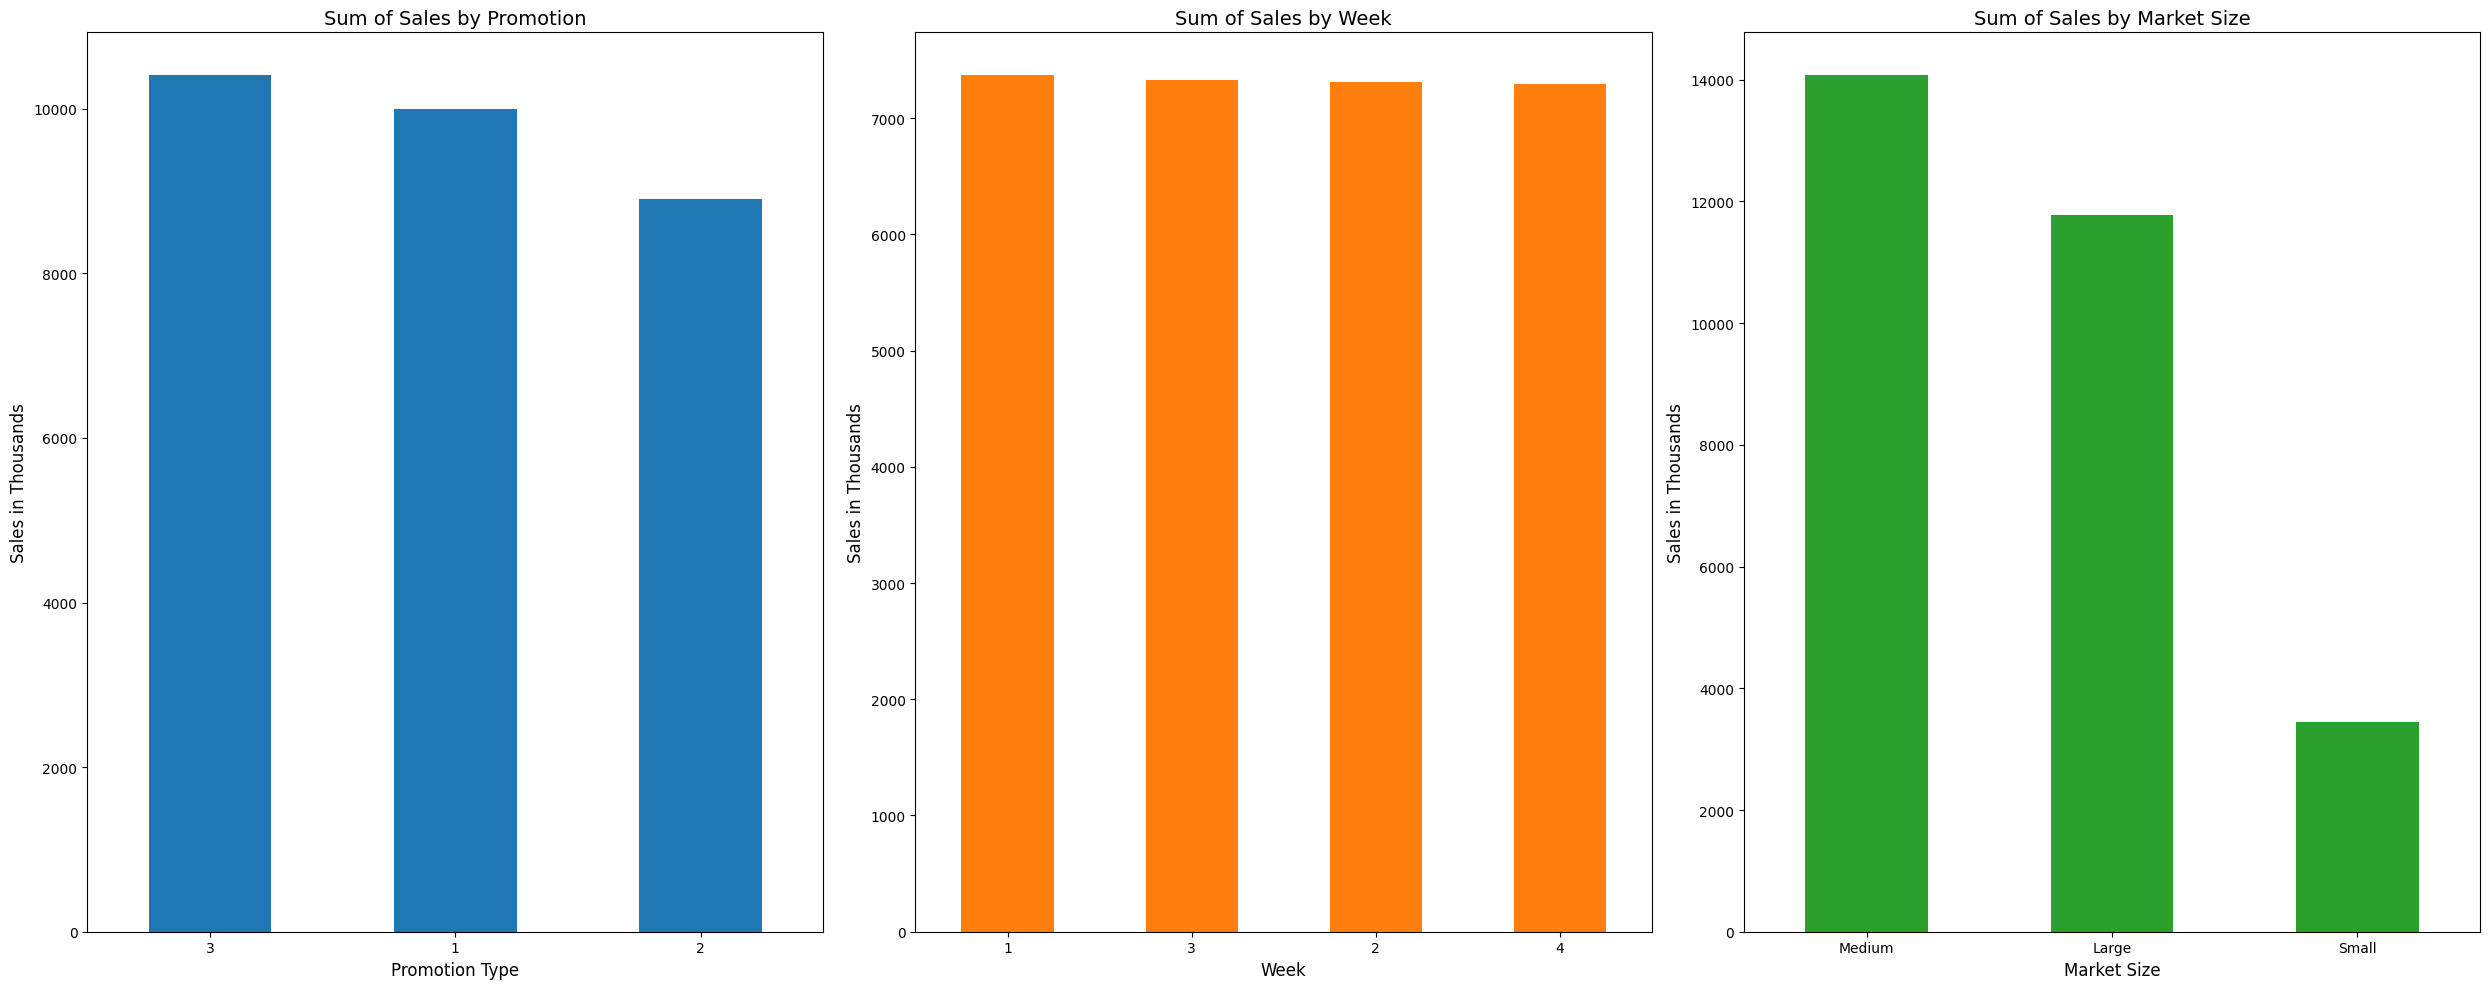

In [39]:
import matplotlib.pyplot as plt

# Aggregate sales data
sales_by_promotion = df.groupby("Promotion")["SalesInThousands"].sum().sort_values(ascending=False)
sales_by_week = df.groupby("week")["SalesInThousands"].sum().sort_values(ascending=False)
sales_by_marktet_id = df.groupby("MarketSize")["SalesInThousands"].sum().sort_values(ascending = False)

# Create subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# First plot: Sales by Promotion
sales_by_promotion.plot(kind="bar", ax=axes[0], color="tab:blue")
axes[0].set_title("Sum of Sales by Promotion", fontsize=14)
axes[0].set_ylabel("Sales in Thousands", fontsize=12)
axes[0].set_xlabel("Promotion Type", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Second plot: Sales by Week (FIXED)
sales_by_week.plot(kind="bar", ax=axes[1], color="tab:orange")  # Use sales_by_week instead of df
axes[1].set_title("Sum of Sales by Week", fontsize=14)
axes[1].set_ylabel("Sales in Thousands", fontsize=12)
axes[1].set_xlabel("Week", fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

sales_by_marktet_id.plot(kind = "bar", ax = axes[2], color="tab:green")
axes[2].set_title("Sum of Sales by Market Size", fontsize = 14)
axes[2].set_ylabel("Sales in Thousands", fontsize=12)
axes[2].set_xlabel("Market Size", fontsize=12)
axes[2].tick_params(axis='x', rotation=0)



plt.tight_layout() 
plt.show()


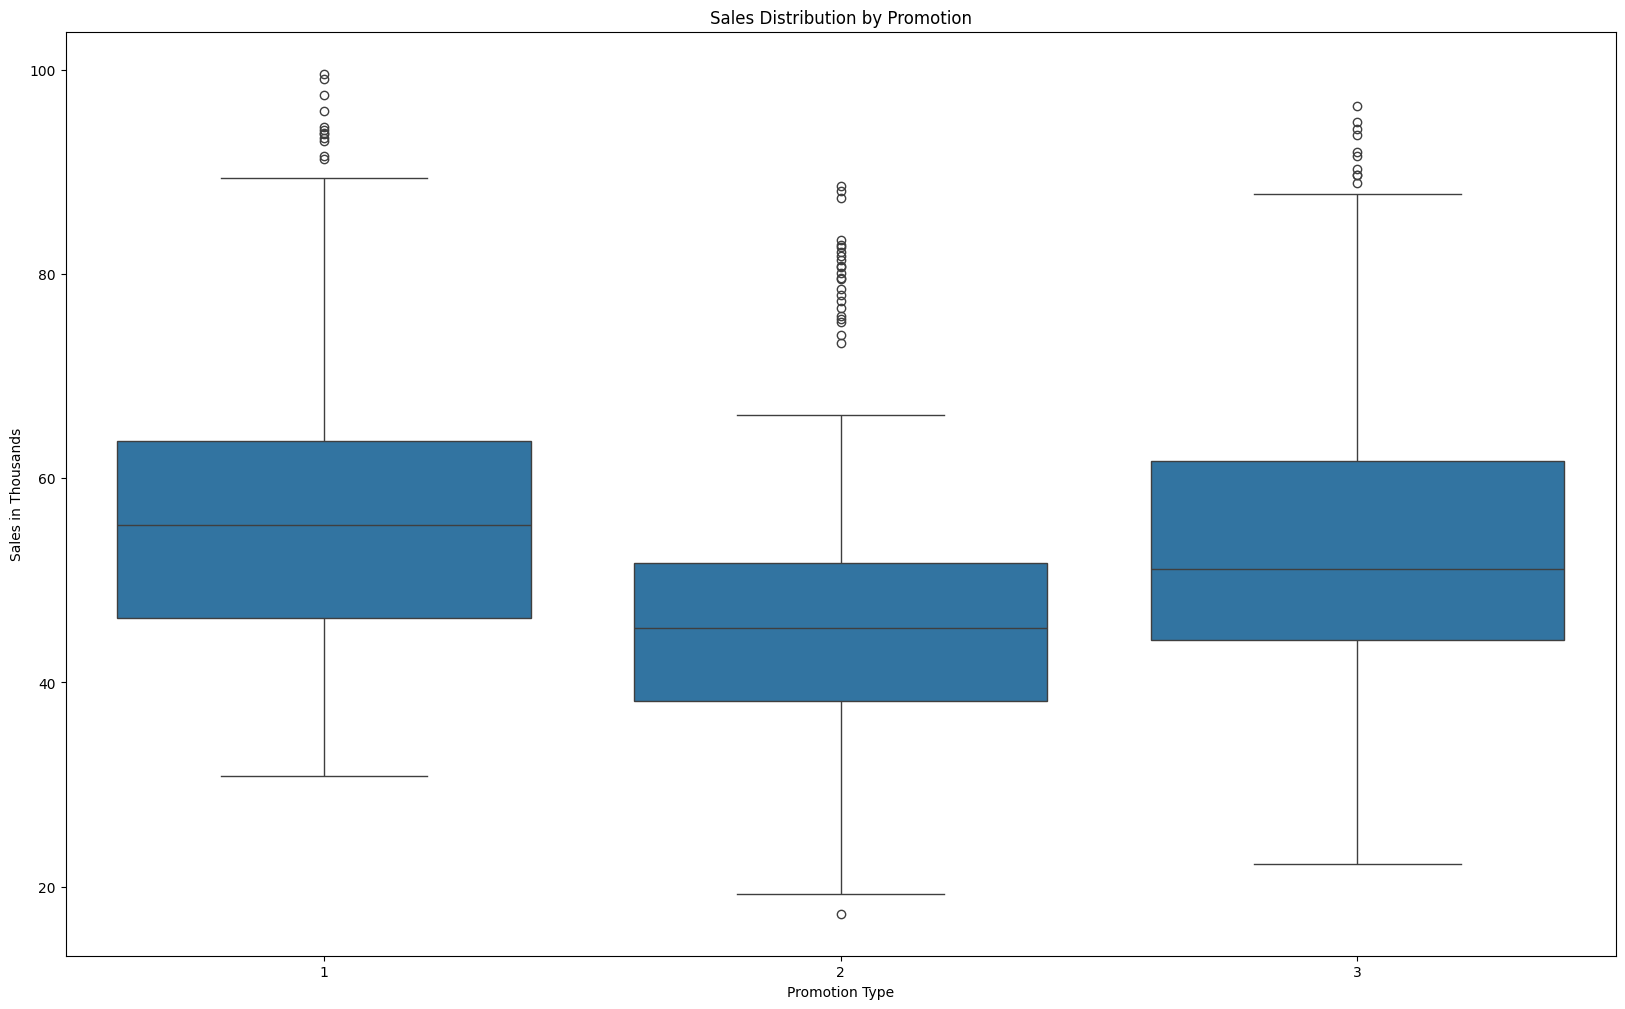

In [40]:
plt.figure(figsize=(20, 12))
sns.boxplot(x="Promotion", y="SalesInThousands", data=df)
plt.title("Sales Distribution by Promotion")
plt.xlabel("Promotion Type")
plt.ylabel("Sales in Thousands")
plt.show()

In [41]:
#H0 Null Hypothesis ----> There is a signficant association between Market Size and Promotion
contingency_table = df.pivot_table(index="MarketSize", columns="Promotion", aggfunc = "size")
chi2_contingency(contingency_table).pvalue
# Since p value is > 0.05 we fail to reject the null hypothesis

np.float64(0.3134943324468101)

In [42]:
sales_by_promotion_mean = df.groupby("Promotion")["SalesInThousands"].mean().sort_values(ascending=True)

anova_result = stats.f_oneway(
    df[df["Promotion"]==1]["SalesInThousands"],
    df[df["Promotion"]==2]["SalesInThousands"],
    df[df["Promotion"]==3]["SalesInThousands"],
)

if anova_result.pvalue < 0.05:
    print(f"There is a statistically significant difference between the means of sales for each Promotion.\nThe p-value is {anova_result.pvalue:.5f}")
else:
    print(f"There is no statistically significant difference between the means of sales for each Promotion.\nThe p-value is {anova_result.pvalue:.5f}")

There is a statistically significant difference between the means of sales for each Promotion.
The p-value is 0.00000


In [43]:
levene_stat, levene_p = levene(
    df[df["Promotion"]==1]["SalesInThousands"],
    df[df["Promotion"]==3]["SalesInThousands"]
)
levene_p #No statistical difference in variability

np.float64(0.9949817039164103)

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df['SalesInThousands'], df['Promotion'].astype(str) + "_" + df['MarketSize'].astype(str))

tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

tukey_df_filtered = tukey_df[tukey_df["group1"].str.split("_").str[1] == tukey_df["group2"].str.split("_").str[1]]
tukey_df_filtered



,group1,group2,meandiff,p-adj,lower,upper,reject
2,1_Large,2_Large,-14.9139,0.0000,-21.0355,-8.7922,True
5,1_Large,3_Large,1.9681,0.9911,-4.6125,8.5486,False
10,1_Medium,2_Medium,-8.5583,0.0000,-13.2510,-3.8655,True
13,1_Medium,3_Medium,-2.2037,0.8615,-6.8197,2.4123,False
17,1_Small,2_Small,-9.3519,0.1908,-20.5730,1.8693,False
20,1_Small,3_Small,-0.6483,1.0000,-10.7773,9.4807,False
23,2_Large,3_Large,16.8819,0.0000,10.4940,23.2698,True
28,2_Medium,3_Medium,6.3545,0.0004,1.8811,10.8280,True
32,2_Small,3_Small,8.7035,0.2292,-2.0940,19.5011,False
